In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\Data\SAdata\2012_A.csv")

In [3]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,1.200000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,1.300000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,1.216667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,1.233333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,1.316667,1.0


The unitsread are in Amps, to get them in kWh, we multiply by the South Africa Voltage (as it is 1 hour timestamps) and divide by 1000

In [4]:
df["Unitsread"] = df["Unitsread"]*220/1000

In [5]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,0.264000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,0.286000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,0.267667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,0.271333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,0.289667,1.0


In [6]:
#Lengths of Profile ID groups
groups1 = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
groups1 = groups1.sort_values(ascending = False)
print(groups1.head())
len(groups1)

ProfileID
12006364    8769
12006416    8769
12006299    8769
12006303    8769
12006433    8769
Name: Unitsread, dtype: int64


1587

We can see that the right ID is the profile ID. There is however not exactly 8760 values, lets plot the number of values for each ID to get more insight

1587


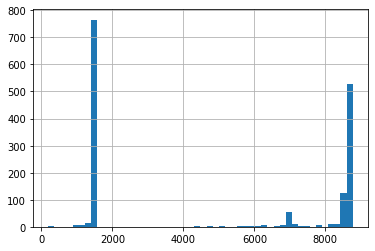

In [7]:
#groups1 = groups1[groups1<2000]
#groups1 = groups1[groups1 > 1400]

print(len(groups1))

groups1.hist(bins = 50)




There is an enormous peak around 1500 datapoints. As this represents 1.5x more households as the complete households, it is interesting to understand what is happening. 




## Analysing the peak at 1500 datapoints

In [8]:
less_data = groups1[groups1<2000]
less_data = less_data[less_data>1450]

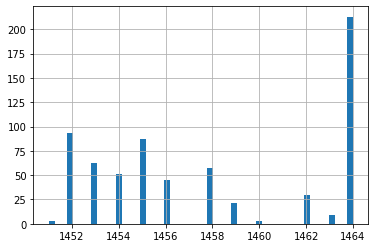

In [9]:
less_data.hist(bins = 50)

In [10]:
ld = df[df["ProfileID"].isin(less_data.index)]

In [11]:
ld.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
1138464,BTW001,12019685,2012-11-01 00:00:00,1.272333,1.0
1138465,BTW001,12019685,2012-11-01 01:00:00,0.564667,1.0
1138466,BTW001,12019685,2012-11-01 02:00:00,0.264000,1.0
1138467,BTW001,12019685,2012-11-01 03:00:00,0.319000,1.0
1138468,BTW001,12019685,2012-11-01 04:00:00,0.264000,1.0


In [13]:
ld["date"] = pd.to_datetime(df["Datefield"]).dt.date

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
ld["Month"] = pd.to_datetime(df["Datefield"]).dt.month

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Select a random ID from the sub set

In [15]:
ld1 = ld[ld["ProfileID"] == 12020725]

In [16]:
ld1.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [17]:
day = ld1.groupby("date")['Unitsread'].apply(lambda x: len(x))


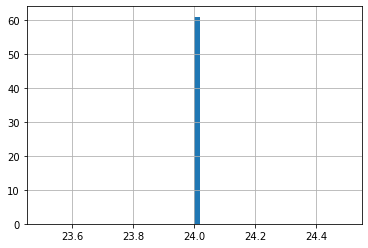

In [18]:
day.hist(bins = 50)

All days for this household have 24 entries - full days are missing not hours in a day

In [19]:
ld1.head()


,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [20]:
month = ld1.groupby("Month")['Unitsread'].apply(lambda x: len(x))
month.head()

Month
11    720
12    744
Name: Unitsread, dtype: int64

There is only November and December data 

## Formatting the dataset 


Keep only the households with more than 8700 readings

In [21]:
group = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
group = group.sort_values(ascending = False)

In [22]:
group = group[group>8700]
len(group)

480

In [23]:
ndf= df[df["ProfileID"].isin(group.index)]

In [24]:
grp = ndf.groupby("ProfileID")['Unitsread'].sum()

len(grp[grp == 0])

92

In [25]:
grp = grp[grp>1]

print(len(grp))

ndf = ndf[ndf["ProfileID"].isin(grp.index)]

387


Complete the number of readings for each households with NANs, so that every households has a whole year

In [26]:
year = pd.date_range("01/01/2012 00:00", "31/12/2012 23:00", freq="1h")

ndf2 = ndf

d = [None]*387
add = [None]*387
ids = list(grp.index)
for i in range(len(ids)):
    d[i] = df[df["ProfileID"] == ids[i]]
    r = list(d[i]["Datefield"])
    years = [x.strftime("%Y-%m-%d %H:%M:%S") for x in year]
    main_list = np.setdiff1d(list(years),r)
    add[i] = pd.DataFrame({"RecorderID": "BTW001", "ProfileID":ids[i], "Datefield": main_list,"Unitsread": np.nan, "Valid": 1})
    print(len(add[i])+len(r)-8784)
    ndf2 = ndf2.append(add[i])
    
ndf2 = ndf2.sort_values(['ProfileID', 'Datefield'])

ndf2 = ndf2.reset_index(drop = True)



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [30]:
len(ndf2)/8784

387.0

In [31]:
group1 = ndf2.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))

In [32]:
group1.head()

ProfileID
12005372    8784
12005376    8784
12005385    8784
12005389    8784
12005398    8784
Name: Unitsread, dtype: int64

We now have full households

## Having mean hourly data per weekday per season

### Getting all the info we need 

In [33]:
ndf2["Month"] = pd.to_datetime(ndf2["Datefield"]).dt.month
ndf2["Hour"] = pd.to_datetime(ndf2["Datefield"]).dt.hour


In [34]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4


Careful, the seasons are opposite to the London seasons

In [35]:
season = ndf2["Month"].where(
    (ndf2["Month"] != 12), 'Summer').where(
    (ndf2["Month"] != 1), 'Summer').where(
    (ndf2["Month"] != 2), 'Summer').where(
    (ndf2["Month"] != 3), 'Autumn').where(
    (ndf2["Month"] != 4), 'Autumn').where(
    (ndf2["Month"] != 5), 'Autumn').where(
    (ndf2["Month"] != 6), 'Winter').where(
    (ndf2["Month"] != 7), 'Winter').where(
    (ndf2["Month"] != 8), 'Winter').where(
    (ndf2["Month"] != 9), 'Spring').where(
    (ndf2["Month"] != 10), 'Spring').where(
    (ndf2["Month"] != 11), 'Spring')

In [36]:
season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [37]:
ndf2["Season"] = season

In [38]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer


In [39]:
ndf2["Weekday"] = pd.to_datetime(ndf2["Datefield"]).dt.weekday

In [40]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season,Weekday
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer,6
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer,6
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer,6
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer,6
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer,6


In [41]:
ndf2["Weekday"] = ndf2["Weekday"].where(
    (ndf2["Weekday"] != 0), 'Monday').where(
    (ndf2["Weekday"] != 1), 'Tuesday').where(
    (ndf2["Weekday"] != 2), 'Wednesday').where(
    (ndf2["Weekday"] != 3), 'Thursday').where(
    (ndf2["Weekday"] != 4), 'Friday').where(
    (ndf2["Weekday"] != 5), 'Saturday').where(
    (ndf2["Weekday"] != 6), 'Sunday')

In [42]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season,Weekday
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer,Sunday
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer,Sunday
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer,Sunday
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer,Sunday
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer,Sunday


### Isolating the seasons and creating the mean profiles

In [75]:
summer = ndf2[ndf2["Season"] == "Summer"]
winter = ndf2[ndf2["Season"] == "Winter"]
autumn = ndf2[ndf2["Season"] == "Autumn"]
spring = ndf2[ndf2["Season"] == "Spring"]

##### Summer

In [76]:
summer_mean_gb = summer.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [77]:
summer_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.110917
                    1       0.107250
                    2       0.107556
                    3       0.100528
                    4       0.096556
Name: Unitsread, dtype: float64

In [78]:
summer_mean = summer_mean_gb.to_frame()
summer_mean.head()

Unitsread
ProfileID Weekday Hour           
12005372  Friday  0      0.110917
                  1      0.107250
                  2      0.107556
                  3      0.100528
                  4      0.096556

In [79]:
summer_mean.reset_index(inplace = True)

In [80]:
summer_mean["season"] = "Summer"

In [81]:
summer_mean.columns = ['profile_ID', 'day_of_the_week', 'hour', 'consumption_kWh', 'season']

In [82]:
columns = ['profile_ID', 'season', 'day_of_the_week', 'hour', 'consumption_kWh']

In [83]:
summer_mean = summer_mean[columns]

In [84]:
summer_mean.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh
0,12005372,Summer,Friday,0,0.110917
1,12005372,Summer,Friday,1,0.107250
2,12005372,Summer,Friday,2,0.107556
3,12005372,Summer,Friday,3,0.100528
4,12005372,Summer,Friday,4,0.096556


##### Winter

In [85]:
winter_mean_gb = winter.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [86]:
winter_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.142214
                    1       0.138024
                    2       0.124143
                    3       0.132000
                    4       0.147452
Name: Unitsread, dtype: float64

In [87]:
winter_mean = winter_mean_gb.to_frame()
winter_mean.reset_index(inplace = True)
winter_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.142214
1,12005372,Friday,1,0.138024
2,12005372,Friday,2,0.124143
3,12005372,Friday,3,0.132000
4,12005372,Friday,4,0.147452


In [88]:
winter_mean["season"] = "Winter"

winter_mean.columns = ['profile_ID', 'day_of_the_week', 'hour', 'consumption_kWh', 'season']

columns = ['profile_ID', 'season', 'day_of_the_week', 'hour', 'consumption_kWh']

winter_mean = winter_mean[columns]

winter_mean.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh
0,12005372,Winter,Friday,0,0.142214
1,12005372,Winter,Friday,1,0.138024
2,12005372,Winter,Friday,2,0.124143
3,12005372,Winter,Friday,3,0.132000
4,12005372,Winter,Friday,4,0.147452


##### Spring

In [89]:
spring_mean_gb = spring.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [90]:
spring_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.251026
                    1       0.254692
                    2       0.232974
                    3       0.227333
                    4       0.229308
Name: Unitsread, dtype: float64

In [91]:
spring_mean = spring_mean_gb.to_frame()
spring_mean.reset_index(inplace = True)
spring_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.251026
1,12005372,Friday,1,0.254692
2,12005372,Friday,2,0.232974
3,12005372,Friday,3,0.227333
4,12005372,Friday,4,0.229308


In [92]:
spring_mean["season"] = "Spring"

spring_mean.columns = ['profile_ID', 'day_of_the_week', 'hour', 'consumption_kWh', 'season']

columns = ['profile_ID', 'season', 'day_of_the_week', 'hour', 'consumption_kWh']

spring_mean = spring_mean[columns]

spring_mean.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh
0,12005372,Spring,Friday,0,0.251026
1,12005372,Spring,Friday,1,0.254692
2,12005372,Spring,Friday,2,0.232974
3,12005372,Spring,Friday,3,0.227333
4,12005372,Spring,Friday,4,0.229308


##### Autumn

In [93]:
autumn_mean_gb = autumn.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [94]:
autumn_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.133128
                    1       0.121282
                    2       0.127205
                    3       0.119026
                    4       0.120718
Name: Unitsread, dtype: float64

In [95]:
autumn_mean = autumn_mean_gb.to_frame()
autumn_mean.reset_index(inplace = True)
autumn_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.133128
1,12005372,Friday,1,0.121282
2,12005372,Friday,2,0.127205
3,12005372,Friday,3,0.119026
4,12005372,Friday,4,0.120718


In [96]:
autumn_mean["season"] = "Autumn"

autumn_mean.columns = ['profile_ID', 'day_of_the_week', 'hour', 'consumption_kWh', 'season']

columns = ['profile_ID', 'season', 'day_of_the_week', 'hour', 'consumption_kWh']

autumn_mean = autumn_mean[columns]

autumn_mean.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh
0,12005372,Autumn,Friday,0,0.133128
1,12005372,Autumn,Friday,1,0.121282
2,12005372,Autumn,Friday,2,0.127205
3,12005372,Autumn,Friday,3,0.119026
4,12005372,Autumn,Friday,4,0.120718


### Merging the data into one dataset

In [97]:
sa_analysis = pd.concat([winter_mean, summer_mean, spring_mean, autumn_mean])

In [98]:
sa_analysis.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh
0,12005372,Winter,Friday,0,0.142214
1,12005372,Winter,Friday,1,0.138024
2,12005372,Winter,Friday,2,0.124143
3,12005372,Winter,Friday,3,0.132000
4,12005372,Winter,Friday,4,0.147452


In [99]:
sa_analysis.to_csv(r"..\Data\SAdata\SA_revised_narrow.csv", sep = ",")